In [299]:
#import modules
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [300]:
product_names = []   # List to store names of the products
product_prices = []     # List to store prices of the products

In [302]:
#Pull website to scrape
Rq = requests.get('https://shopzetu.com/collections/bags')
soup = BeautifulSoup(Rq.content, 'html.parser')

In [303]:
#get data from the website and store in the lists created
for product in soup.find_all('div', attrs={'class':'grid-product__meta'}):
    name = product.find('div', attrs={'class':'grid-product__title grid-product__title--body'})
    price = product.find('div', attrs={'class':'grid-product__price'}).text.strip()
    price = price.replace('KSh', '').split('.')[0].strip()
    product_names.append(name.text)
    product_prices.append(price)
    product_names = product_names[:15] # taking 15 rows only for graph
    product_prices = product_prices[:15] # taking 15 rows only for graph

In [304]:
# store the data in pandas DataFrame
data = {'Product Name': product_names, 'Price': product_prices}
df = pd.DataFrame(data)

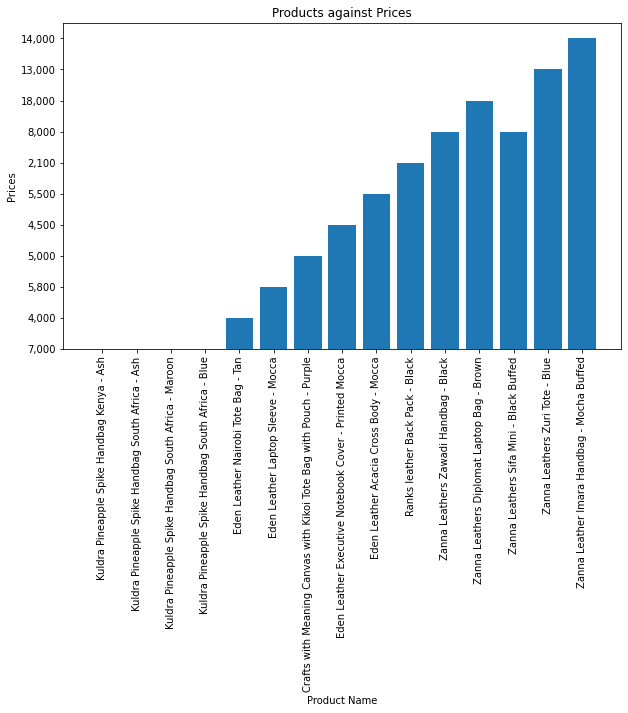

In [305]:
# Read from the dataframe and visualize the data
plt.figure(figsize=(10, 6))
plt.bar(df['Product Name'], df['Price'])
plt.xlabel('Product Name')
plt.ylabel('Prices')
plt.title('Products against Prices')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# additional - Save the DataFrame to a CSV file
df.to_csv('product_data.csv', index=False)